In [1]:
!pip install -r requirements.txt

In [2]:
from parliamentApiHelpers import *
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

coalitions = {
"52": ["2022-07-18", "2023-03-14"],
"51": ["2021-01-26", "2022-07-17"],
"50": ["2019-04-29", "2021-01-25"],
"49": ["2016-11-23", "2019-04-28"],
"48": ["2015-04-09", "2016-11-22"],
"47": ["2014-03-26", "2015-04-08"]
}

In [3]:
selectedCoalition = "52"
selectedCoalitionFolder = f"coalition_{selectedCoalition}"

In [4]:
pApi = ParliamentAPI()
coalitionVotesDf, coalitionVotesMetadata, voterData = pApi.get_coalition_votes(selectedCoalition)
adjacencyMatrixJaccard = pApi.get_adjacency_matrix_df(selectedCoalition, metric="jaccards", included_vote_values=["POOLT", "VASTU", "ERAPOOLETU"])
adjacencyMatrixFracMul = pApi.get_adjacency_matrix_df(selectedCoalition, metric="fracMul", included_vote_values=["POOLT", "VASTU", "ERAPOOLETU"])
fractions_df = pApi.get_fractions()

Votes df found in coalition_52/votes.parquet
Fractions data already exists in fractions.parquet.


In [57]:
adjacencyMatrixJaccard.to_parquet(f"{selectedCoalitionFolder}/adjacencyMatrix.parquet")

In [5]:
voter_uuid_to_name = voterData["name"].to_dict()
voter_name_to_uuid = {v:k for k, v in voter_uuid_to_name.items()}
voterFractionData = voterData.merge(fractions_df, left_on='factionId', right_index=True)
voter_uuid_to_color = voterFractionData["colorHex"].to_dict()
voter_uuid_to_fraction = voterFractionData["name_y"].to_dict()
unique_vote_values = set([item for sublist in list(coalitionVotesDf[s].unique() for s in coalitionVotesDf.columns) for item in sublist if item == item])

In [6]:
unique_vote_values

{'EI_HAALETANUD', 'ERAPOOLETU', None, 'POOLT', 'PUUDUB', 'VASTU'}

In [7]:
included_vote_values = ["POOLT", "VASTU", "ERAPOOLETU"]

In [8]:
adjacencyMatrixJaccard

6b45cfb5-8a17-481c-b674-80fc00c6cf5d  \
6b45cfb5-8a17-481c-b674-80fc00c6cf5d                              1.000000   
d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9                              0.385321   
9f3d840c-3a49-43de-8c5d-d1990933b692                              0.578947   
7655e8d3-b658-49f0-8e09-f6cbc4a2c714                              0.125461   
90074aa2-4938-41a9-8275-3a6efa1cee31                              0.319489   
...                                                                    ...   
31eee189-0019-469f-8469-7da564bf1af9                              0.273556   
315ea785-8f59-40e5-a158-3de8b908572f                              0.279202   
988995d4-3cbe-4ea7-acdd-6222d0b658b1                              0.277311   
8e9879fd-2967-45ca-892b-42e927b22d75                              0.311615   
e87a03b8-08cf-4b88-8a28-f26da1d65e30                              0.000000   

                                      d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9  \
6b45cfb5-8a17-481c-b674-80fc00c6cf5d                              0.385321   
d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9                              1.000000   
9f3d840c-3a49-43de-8c5d-d1990933b692                              0.283439   
7655e8d3-b658-49f0-8e09-f6cbc4a2c714                              0.074689   
90074aa2-4938-41a9-8275-3a6efa1cee31                              0.185294   
...                                                                    ...   
31eee189-0019-469f-8469-7da564bf1af9                              0.221122   
315ea785-8f59-40e5-a158-3de8b908572f                              0.214900   
988995d4-3cbe-4ea7-acdd-6222d0b658b1                              0.235821   
8e9879fd-2967-45ca-892b-42e927b22d75                              0.245714   
e87a03b8-08cf-4b88-8a28-f26da1d65e30                              0.000000   

                                      9f3d840c-3a49-43de-8c5d-d1990933b692  \
6b45cfb5-8a17-481c-b674-80fc00c6cf5d                              0.578947   
d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9                              0.283439   
9f3d840c-3a49-43de-8c5d-d1990933b692                              1.000000   
7655e8d3-b658-49f0-8e09-f6cbc4a2c714                              0.078341   
90074aa2-4938-41a9-8275-3a6efa1cee31                              0.128289   
...                                                                    ...   
31eee189-0019-469f-8469-7da564bf1af9                              0.138614   
315ea785-8f59-40e5-a158-3de8b908572f                              0.107143   
988995d4-3cbe-4ea7-acdd-6222d0b658b1                              0.123529   
8e9879fd-2967-45ca-892b-42e927b22d75                              0.121387   
e87a03b8-08cf-4b88-8a28-f26da1d65e30                              0.000000   

                                      7655e8d3-b658-49f0-8e09-f6cbc4a2c714  \
6b45cfb5-8a17-481c-b674-80fc00c6cf5d                              0.125461   
d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9                              0.074689   
9f3d840c-3a49-43de-8c5d-d1990933b692                              0.078341   
7655e8d3-b658-49f0-8e09-f6cbc4a2c714                              1.000000   
90074aa2-4938-41a9-8275-3a6efa1cee31                              0.159011   
...                                                                    ...   
31eee189-0019-469f-8469-7da564bf1af9                              0.188755   
315ea785-8f59-40e5-a158-3de8b908572f                              0.120370   
988995d4-3cbe-4ea7-acdd-6222d0b658b1                              0.138710   
8e9879fd-2967-45ca-892b-42e927b22d75                              0.115727   
e87a03b8-08cf-4b88-8a28-f26da1d65e30                              0.000000   

                                      90074aa2-4938-41a9-8275-3a6efa1cee31  \
6b45cfb5-8a17-481c-b674-80fc00c6cf5d                              0.319489   
d8909ed8-ac93-4223-a3ec-55e1bb4ec8a9                              0.185294   
9f3d840c-3a49-43de-8c5d-d1990933b692                    

<AxesSubplot:>

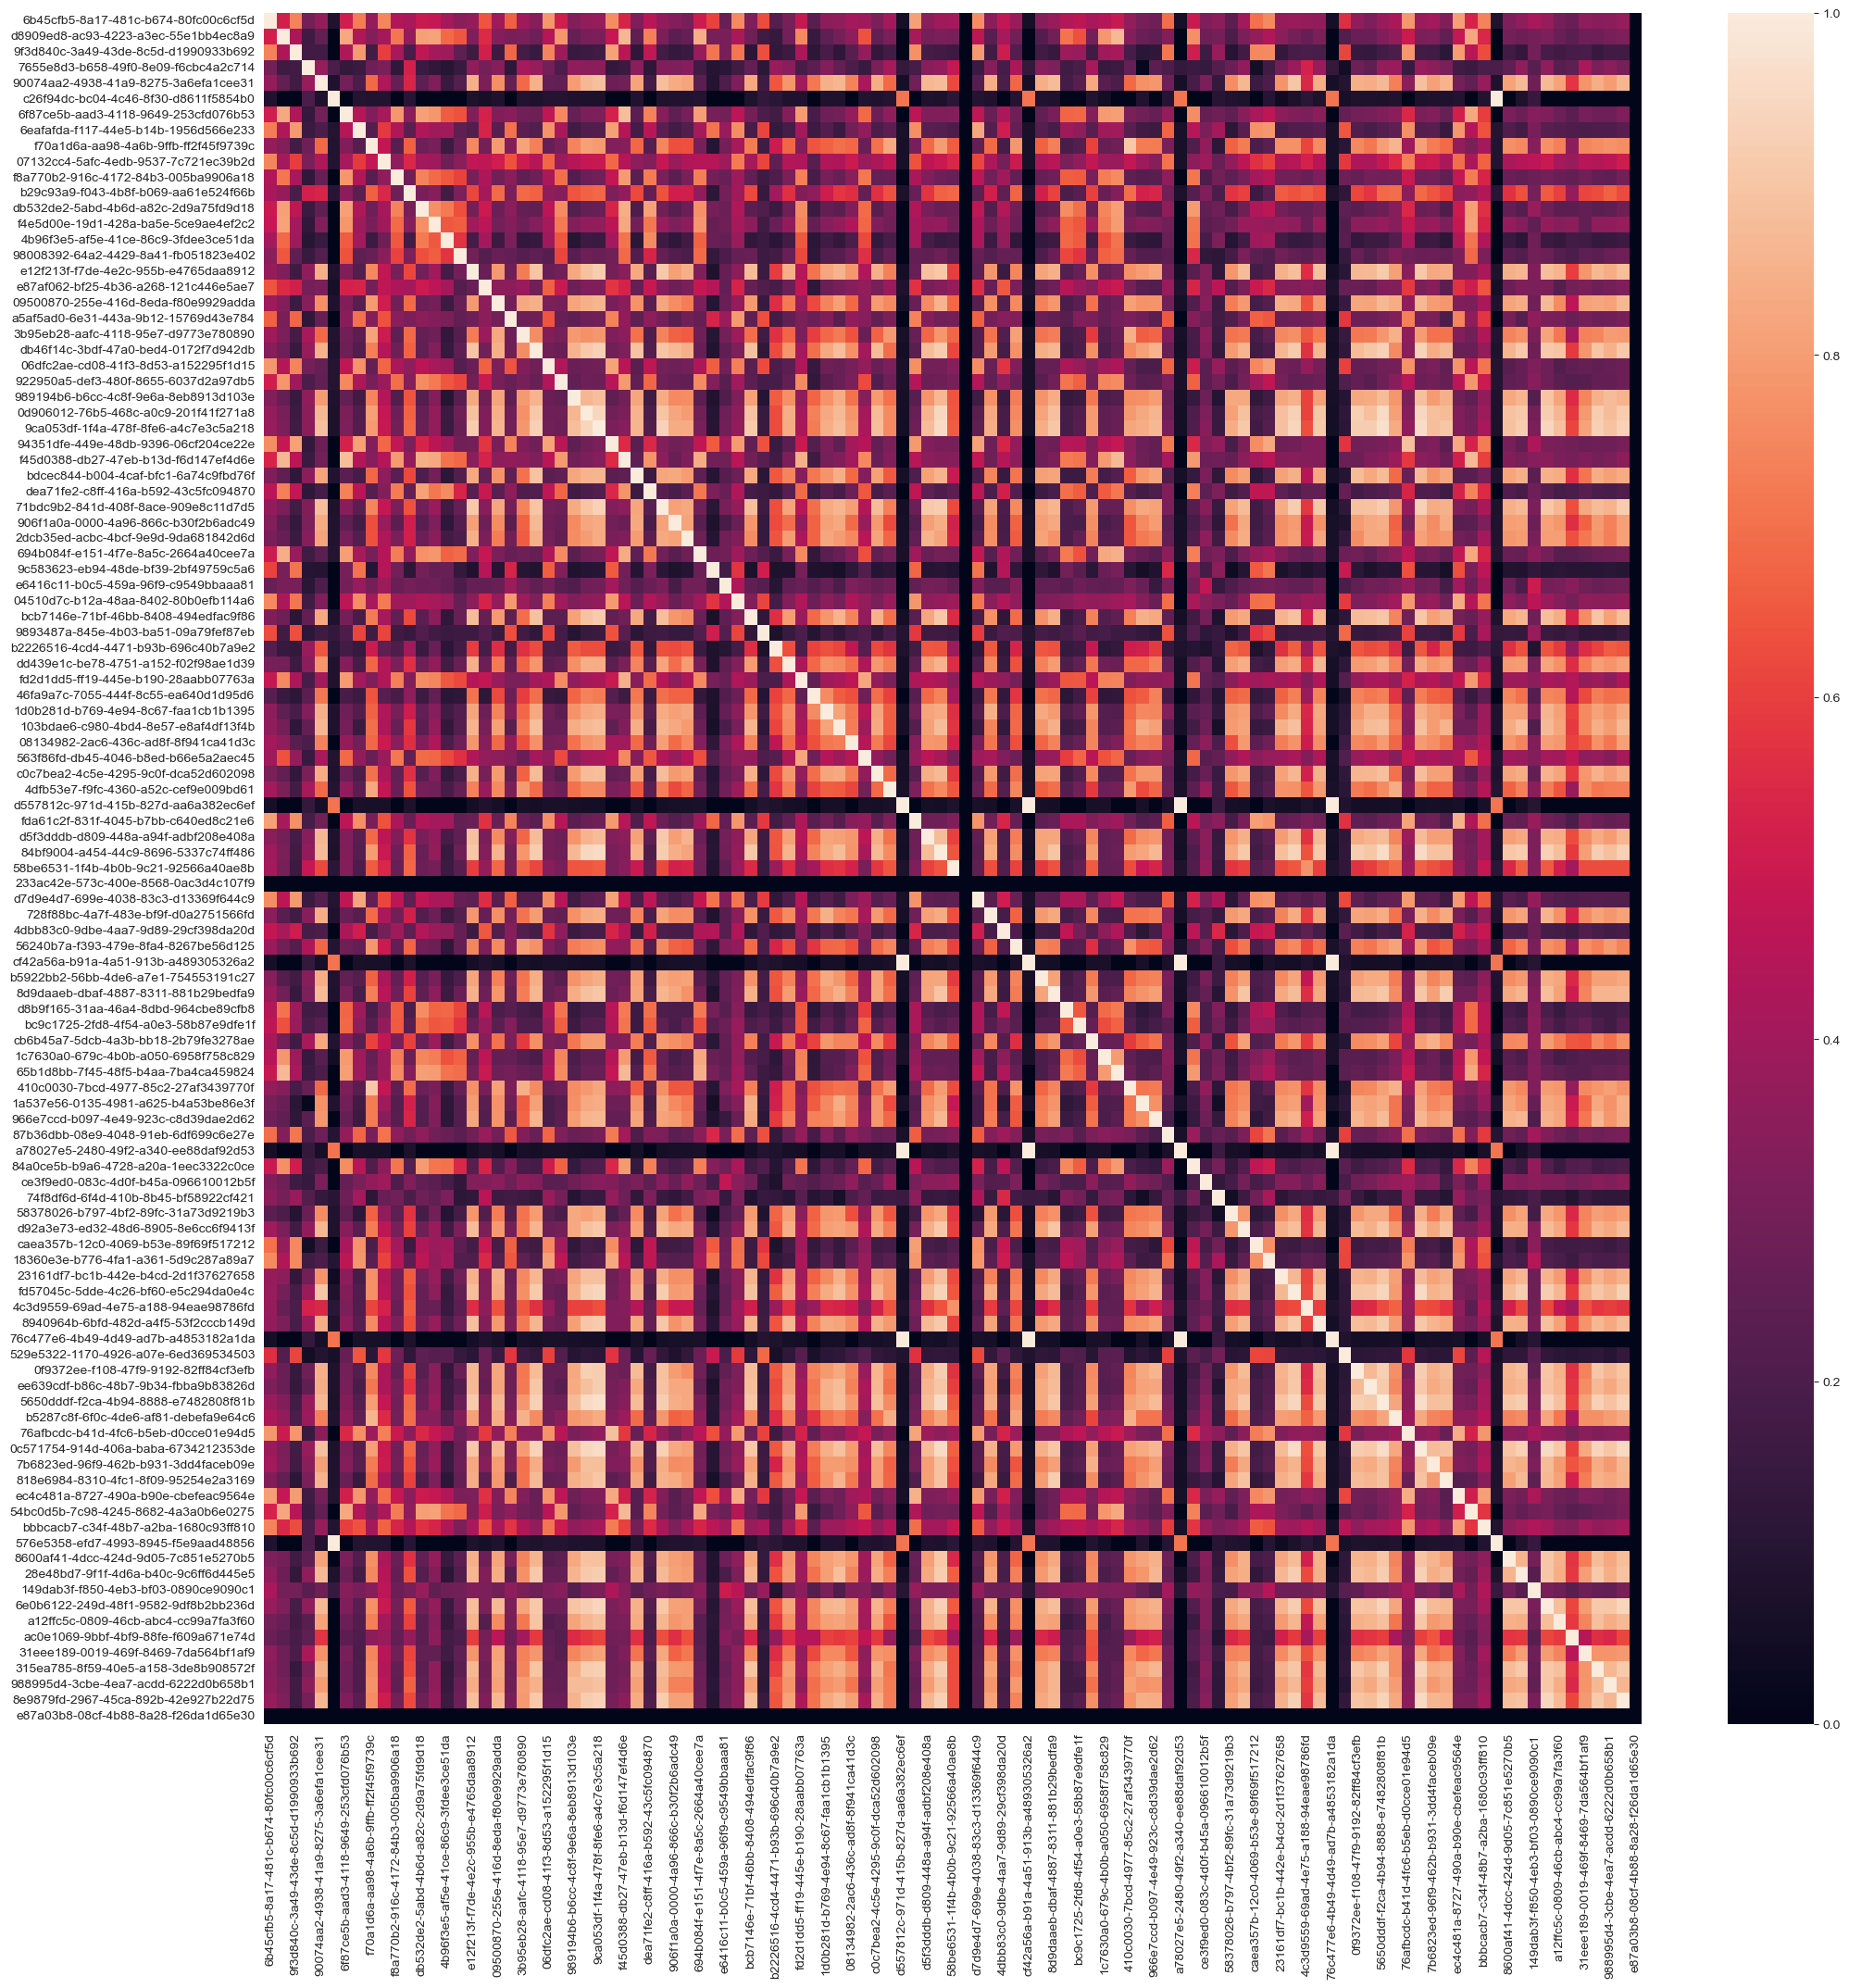

In [9]:
plt.rcParams['figure.figsize'] = (24, 24)
sns.heatmap(adjacencyMatrixFracMul)

In [10]:
G = nx.from_pandas_adjacency(adjacencyMatrixJaccard)
nx.set_node_attributes(G,
    {
        "name":voter_uuid_to_name,
        "fraction": voter_uuid_to_fraction,
        "color": voter_uuid_to_color
    })

In [19]:
def get_top_similar_votes(voter_name: str, adjacency_matrix: pd.DataFrame, voter_data: pd.DataFrame) -> pd.DataFrame:
    uuid = voter_name_to_uuid[voter_name]
    print(uuid)
    df_merged = adjacency_matrix.sort_values(by=uuid, ascending=False)[[uuid]].merge(voter_data, left_index=True, right_index=True).rename(columns={uuid: "value"})
    return df_merged[(df_merged["name"] != voter_name) & (df_merged["value"] > 0)]

name = "Ruuben Kaalep"
top_similar_votes = get_top_similar_votes(name, adjacencyMatrixJaccard, voterData)
#top_similar_votes = top_similar_votes[top_similar_votes.faction != voter_uuid_to_fraction[voter_name_to_uuid[name]]]
top_similar_votes = top_similar_votes.merge(fractions_df, left_on="factionId", right_index=True).sort_values(by="value", ascending=False)

922950a5-def3-480f-8655-6037d2a97db5


<AxesSubplot:title={'center':'Poliitikuga Ruuben Kaalep sarnaseimad hääletajad'}, xlabel='name_x'>

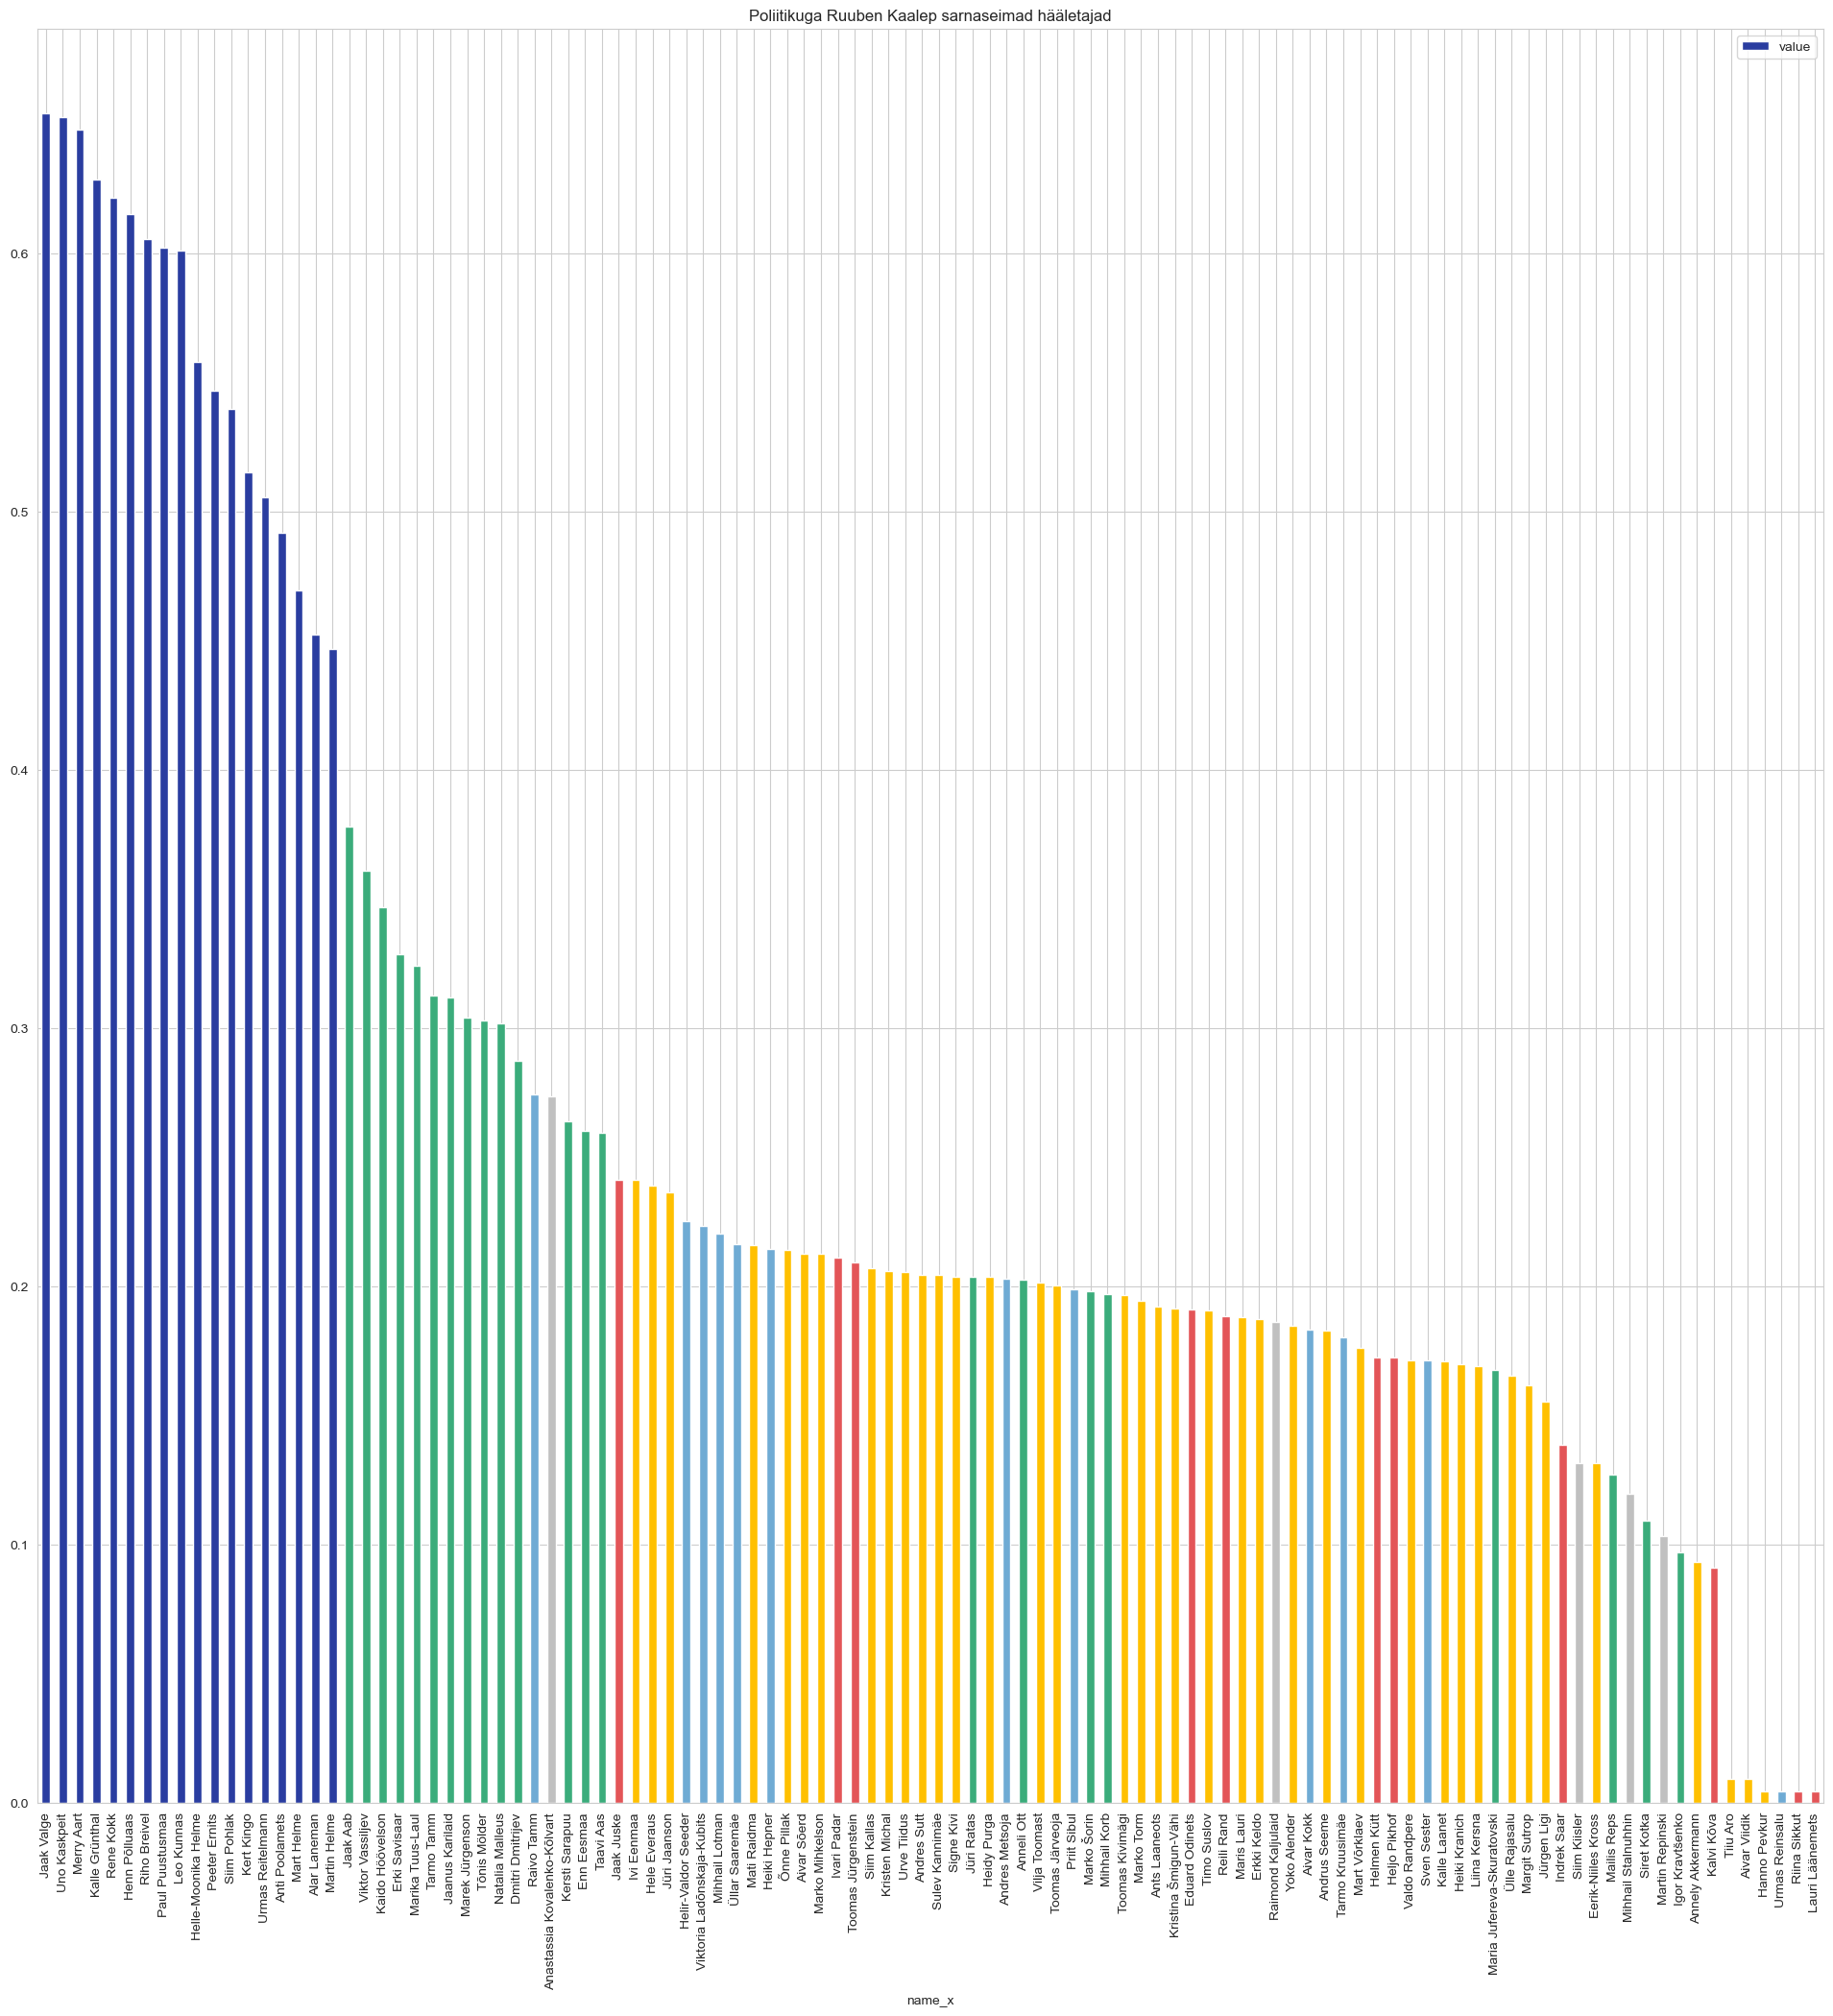

In [20]:
top_similar_votes.plot.bar(x="name_x", y="value", color=top_similar_votes.colorHex, title=f"Poliitikuga {name} sarnaseimad hääletajad")

In [50]:
degweights = np.asarray(list(dict(G.degree(weight="weight")).values()))
degweights.sort()
threshold = degweights[int(len(degweights)*0.1)]

In [51]:
nodelist = [n for n, dw in dict(G.degree(weight="weight")).items() if dw >= threshold]
color_array = [voter_uuid_to_color[uuid] for uuid in nodelist]
G_sub = G.subgraph(nodelist)

In [67]:
edge_attrs = nx.get_edge_attributes(G_sub, "weight")
edge_attrs = {k:v for k, v in edge_attrs.items() if k[0] != k[1]} # remove reflexive
edge_attrs = pd.Series(edge_attrs) # 
edge_attrs /= edge_attrs.max() # scale to max
# filter 
#selected_edges = edge_attrs[edge_attrs > 0.8] # maybe top5 for each?
top_n_nodes_per_edge = 999
selected_edges = edge_attrs.reset_index().groupby("level_0").head(top_n_nodes_per_edge).set_index(["level_0", "level_1"]).rename({0: "value"}).squeeze()

In [68]:
pos = nx.drawing.layout.spring_layout(G, k=5/math.sqrt(len(G.nodes)))

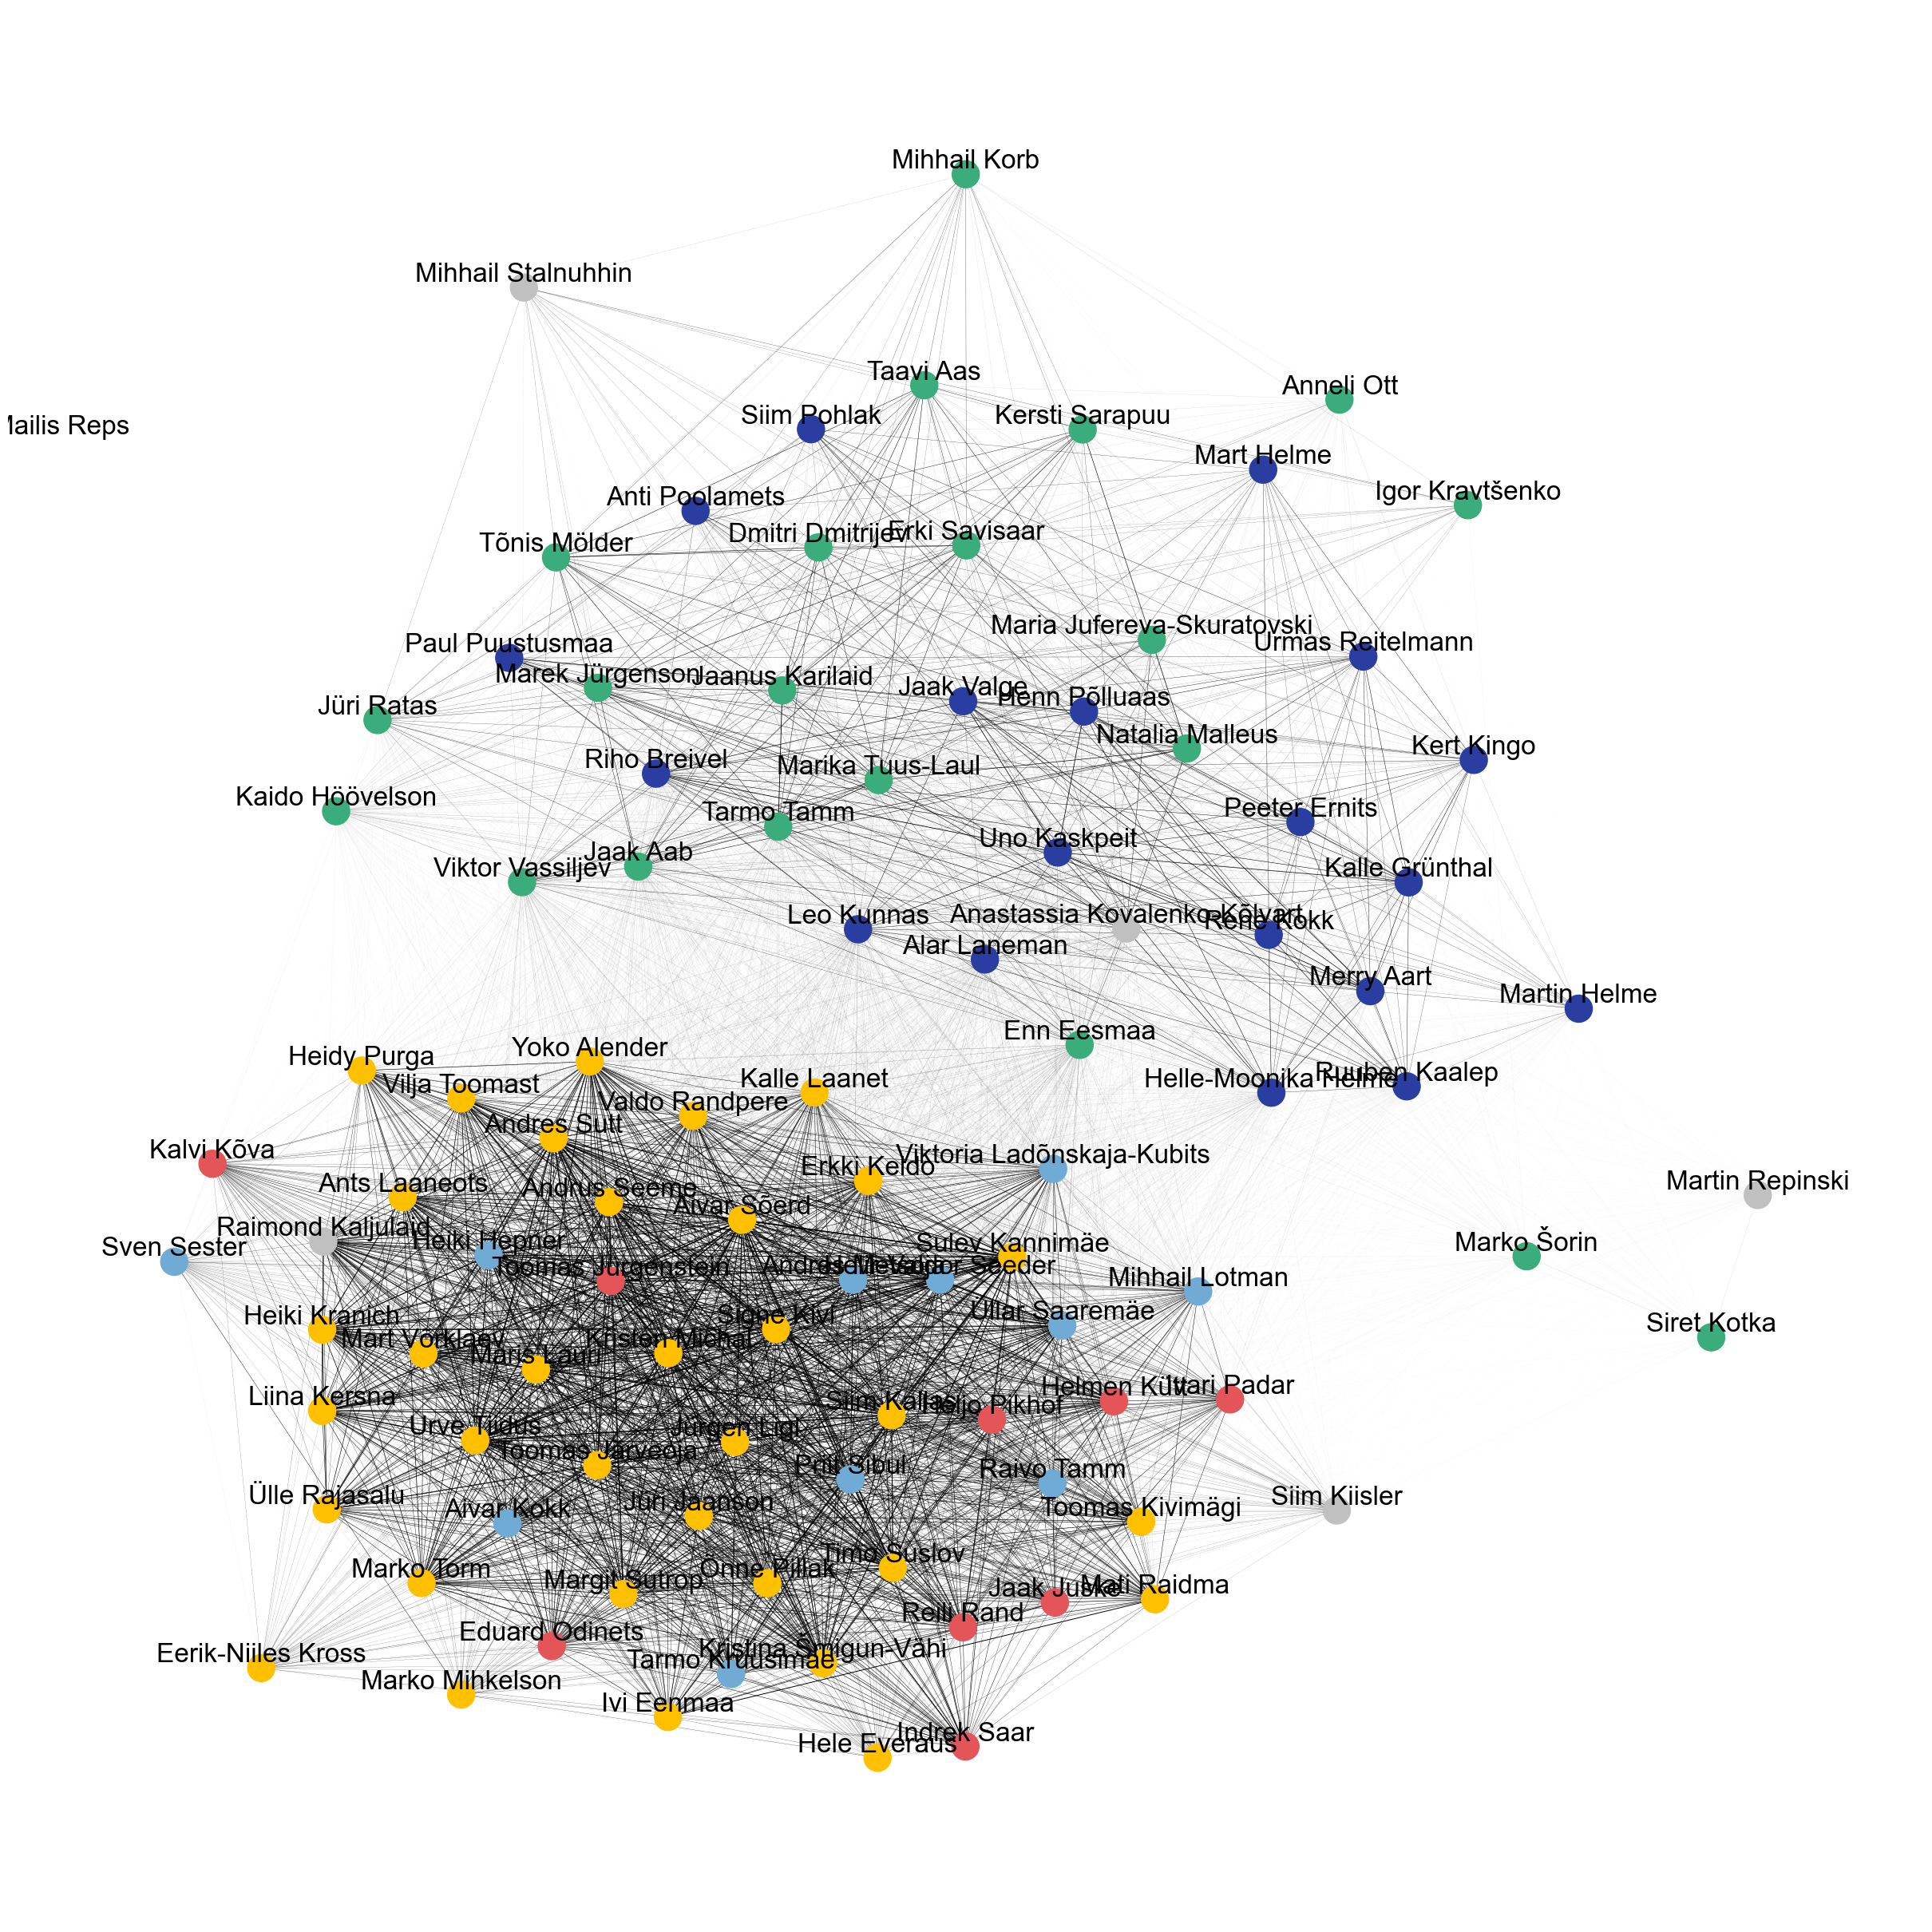

In [69]:
nx.draw(G_sub, pos=pos, nodelist=nodelist, node_color=color_array, edgelist=selected_edges.index, width=np.asarray(selected_edges.values)**3, node_size=600)
nx.draw_networkx_labels(G_sub, pos=pos, labels=voter_uuid_to_name, font_size=24, verticalalignment="bottom")
plt.savefig("voter_graph.png", format="PNG")